In [1]:
%matplotlib inline
import simple_propagate as sp
import PhysConst as PC
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='serif', size=20)

In [2]:
pc = PC.PhysicsConstants()

In [3]:
iflv = 1
fflv = 1
enu = 100.*pc.GeV
param = pc
param.numneu = 3
th = 0.1
sp.AtmosphericNeutrinoOscillationProbability(iflv,fflv,enu,th,param)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/integrate/_ode.py:869: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, 'Unexpected istate=%s' % istate))


0.98090658086816551

In [4]:
prob = np.vectorize(lambda TH,E: sp.AtmosphericNeutrinoOscillationProbability(iflv,fflv,E,TH,param))

In [9]:
energy_array = np.logspace(0,3,50)*pc.GeV
theta_array = np.linspace(0,np.pi,20)
# my mesh 
TH,ENU = np.meshgrid(theta_array,energy_array)

In [10]:
%timeit
PROBABILITY = prob(TH,ENU)

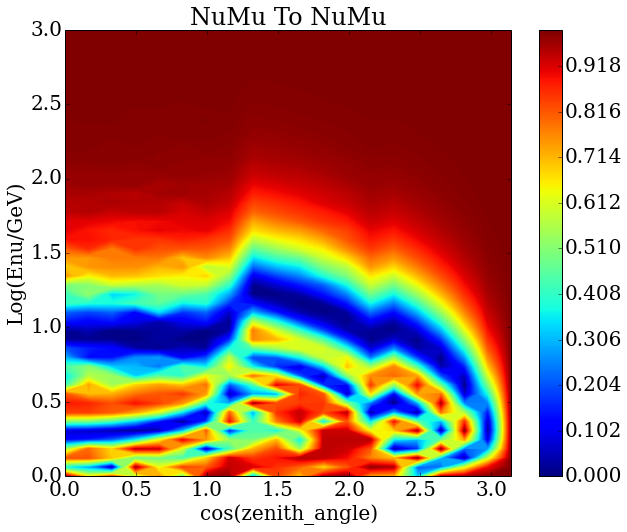

In [14]:
fig = plt.figure(figsize = (10,8))
ICTH = np.pi-TH/2

color_map = plt.get_cmap("jet")
#plt.contourf(np.cos(ICTH),np.log10(ENU/pc.GeV),PROBABILITY,500,cmap = color_map)
plt.contourf(TH,np.log10(ENU/pc.GeV),PROBABILITY,500,cmap = color_map)
plt.colorbar(cmap = color_map)
plt.xlabel("cos(zenith_angle)")
plt.ylabel("Log(Enu/GeV)")
plt.title("NuMu To NuMu")

$\frac{\Delta m^2 L}{E}$

In [12]:
from scipy.integrate import ode

def func(x):
    return x

r=ode(func).set_integrator('zvode', method='adams',rtol=1e-10)

In [26]:
x0= 0.0
xf = 100.0

step = 5.0
y0=0.
r.set_initial_value(x0, y0)
dist=[]
output=[]

while r.successful() and r.t < xf:
    output.append(r.integrate(r.t+step))
    dist.append(r.t)
    
output[-1]

array([ 5000.+0.j])

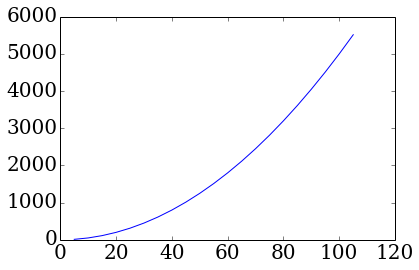

In [22]:
plt.plot(dist,output)

In [27]:
x0= 0.0
xf = 100.0
y0=0.
r.set_initial_value(x0, y0)
r.integrate(xf)

array([ 5000.+0.j])